### Background
This notebook runs through important details of using the Pandas package mainly for financial time series, either from books or other online sources.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 8)
pd.set_option('precision', 3)

In [19]:
import pandas_datareader.data as wb
start = datetime.datetime(2010, 1, 1)
end = datetime.date.today()
msft = wb.DataReader("MSFT", 'yahoo', start, end)
aapl = wb.DataReader("AAPL", 'yahoo', start, end)
aapl_act = wb.DataReader('AAPL', 'yahoo-actions', start, end)

In [20]:
print(aapl.head())

              Open    High     Low   Close     Volume  Adj Close
Date                                                            
2010-01-04  213.43  214.50  212.38  214.01  123432400     27.727
2010-01-05  214.60  215.59  213.25  214.38  150476200     27.775
2010-01-06  214.38  215.23  210.75  210.97  138040000     27.333
2010-01-07  211.75  212.00  209.05  210.58  119282800     27.283
2010-01-08  210.30  212.00  209.06  211.98  111902700     27.464


In [21]:
print(msft.head())

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2010-01-04  30.62  31.10  30.59  30.95  38409100     25.555
2010-01-05  30.85  31.10  30.64  30.96  49749600     25.564
2010-01-06  30.88  31.08  30.52  30.77  58182400     25.407
2010-01-07  30.63  30.70  30.19  30.45  50559700     25.143
2010-01-08  30.28  30.88  30.24  30.66  51197400     25.316


In [22]:
print(aapl_act)

              action  value
2017-02-09  DIVIDEND  0.570
2016-11-03  DIVIDEND  0.570
2016-08-04  DIVIDEND  0.570
2016-05-05  DIVIDEND  0.570
...              ...    ...
2013-05-09  DIVIDEND  0.436
2013-02-07  DIVIDEND  0.379
2012-11-07  DIVIDEND  0.379
2012-08-09  DIVIDEND  0.379

[20 rows x 2 columns]


In [23]:
type(aapl_act)

pandas.core.frame.DataFrame

In [29]:
aapl_act.groupby('action').agg(['sum', 'mean', 'count', 'min', 'max'])

          value                           
            sum   mean count    min    max
action                                    
DIVIDEND  9.119  0.480    19  0.379  0.570
SPLIT     0.143  0.143     1  0.143  0.143

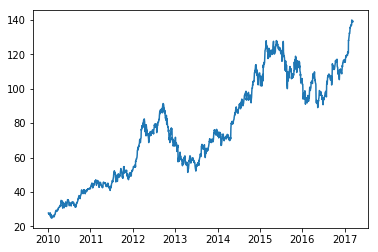

In [30]:
plt.plot(aapl['Adj Close'])

Notice in the above graph that the horizontal axis is set as time automatically by the indexes of the pandas dataframe. This saves you the effort of programming time as the x-axis in other programming language or tools in Python.

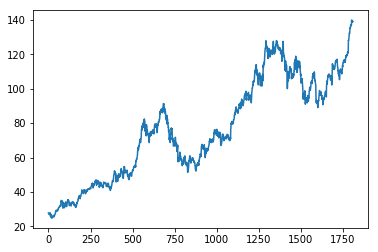

In [54]:
plt.plot(aapl['Adj Close'].reset_index(drop=True))

Notice once the index is reset and dropped, the horizontal axis is set as numbers of days since the very beginning. The matplotlib package really has a seamless connection with Pandas.

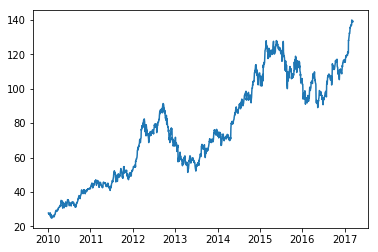

In [55]:
plt.plot(aapl.index, aapl['Adj Close'])

Adding the x-axis in the plotting code is equivalent with not adding it at all.

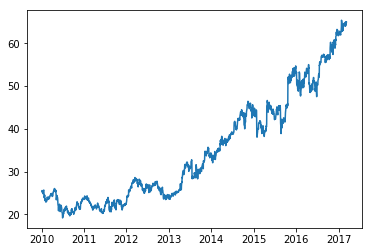

In [31]:
plt.plot(msft['Adj Close'])

In [32]:
print(msft[:3])

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2010-01-04  30.62  31.10  30.59  30.95  38409100     25.555
2010-01-05  30.85  31.10  30.64  30.96  49749600     25.564
2010-01-06  30.88  31.08  30.52  30.77  58182400     25.407


In [44]:
print(msft[['Low', 'Volume']].head())

              Low    Volume
Date                       
2010-01-04  30.59  38409100
2010-01-05  30.64  49749600
2010-01-06  30.52  58182400
2010-01-07  30.19  50559700
2010-01-08  30.24  51197400


In [35]:
pd.concat([msft[:3], aapl[:3]])

              Open    High     Low   Close     Volume  Adj Close
Date                                                            
2010-01-04   30.62   31.10   30.59   30.95   38409100     25.555
2010-01-05   30.85   31.10   30.64   30.96   49749600     25.564
2010-01-06   30.88   31.08   30.52   30.77   58182400     25.407
2010-01-04  213.43  214.50  212.38  214.01  123432400     27.727
2010-01-05  214.60  215.59  213.25  214.38  150476200     27.775
2010-01-06  214.38  215.23  210.75  210.97  138040000     27.333

In [49]:
msftA01 = msft['2012-01'][['Adj Close']][:3]  # This is so convenient
msftA02 = msft['2012-02'][['Adj Close']][:3]  # Slicing dates by year and month only

In [51]:
msftA03 = msft['01/2012'][['Adj Close']][:3]  # Pandas can infer for the date format
msftA04 = msft['02/2012'][['Adj Close']][:3]  

In [50]:
msftA01

            Adj Close
Date                 
2012-01-03     23.164
2012-01-04     23.709
2012-01-05     23.951

In [47]:
msftA02

            Adj Close
Date                 
2012-02-01     25.864
2012-02-02     25.916
2012-02-03     26.166

In [48]:
pd.concat([msftA01, msftA02])

            Adj Close
Date                 
2012-01-03     23.164
2012-01-04     23.709
2012-01-05     23.951
2012-02-01     25.864
2012-02-02     25.916
2012-02-03     26.166

In [52]:
msftA03

            Adj Close
Date                 
2012-01-03     23.164
2012-01-04     23.709
2012-01-05     23.951

In [53]:
msftA04

            Adj Close
Date                 
2012-02-01     25.864
2012-02-02     25.916
2012-02-03     26.166